In [44]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import auc, roc_curve
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA


In [45]:
df = pd.read_csv("encoded_data.csv")
# df.drop(columns=['Cân nặng'], inplace=True)
df.head()

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch
0,0.719322,0.405072,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06
1,0.719322,0.405072,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06
2,0.652838,0.560227,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06
3,0.652838,0.560227,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06
4,0.652838,0.560227,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06


In [52]:
std = MinMaxScaler()
X_std = std.fit_transform(df)


Text(0, 0.5, 'dissimilarity metric cluster')

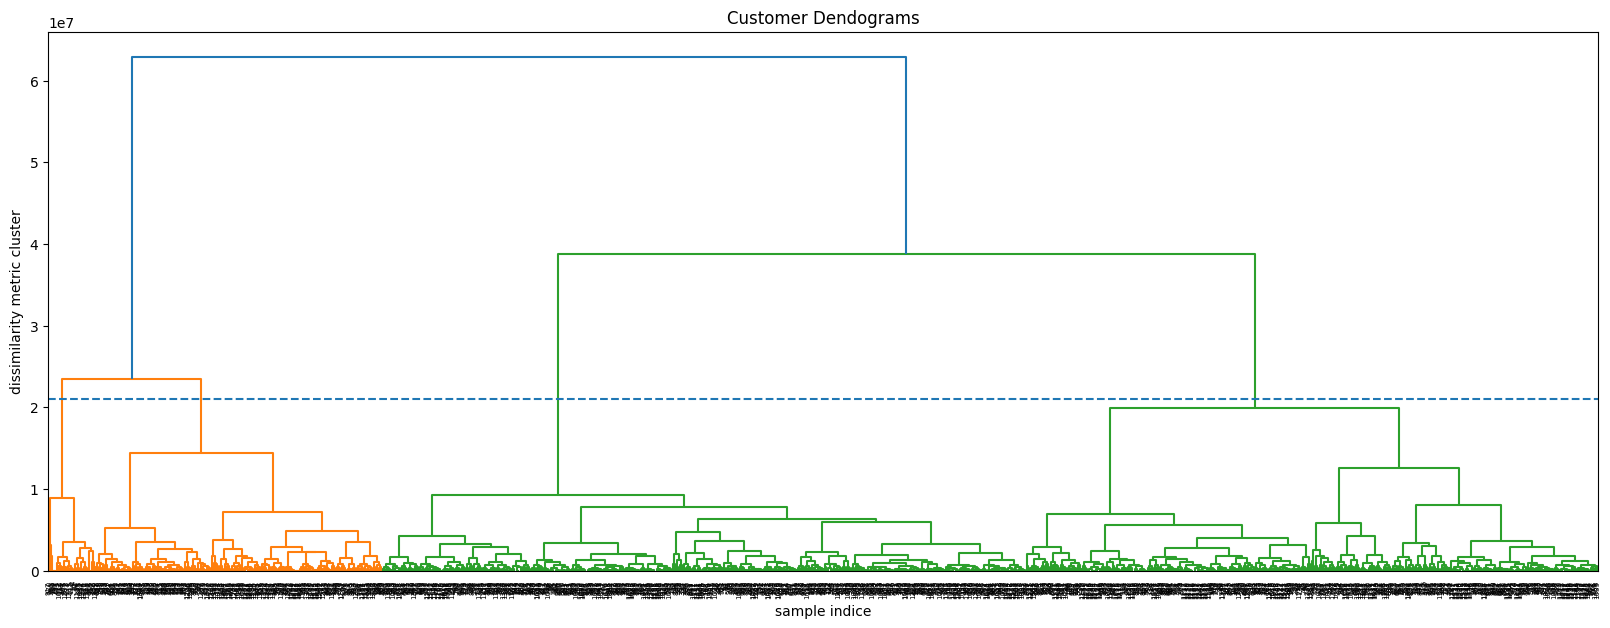

In [53]:
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))
plt.axhline(21000000, linestyle='--')
plt.xlabel('sample indice')
plt.ylabel('dissimilarity metric cluster')

In [54]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels = cluster.fit_predict(X_std)

In [55]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(X_std)
print(tsne_results.shape)

(1368, 2)


In [50]:
pca = PCA(n_components=2)

# Huấn luyện mô hình PCA và biến đổi dữ liệu
X_pca = pca.fit_transform(X_std)

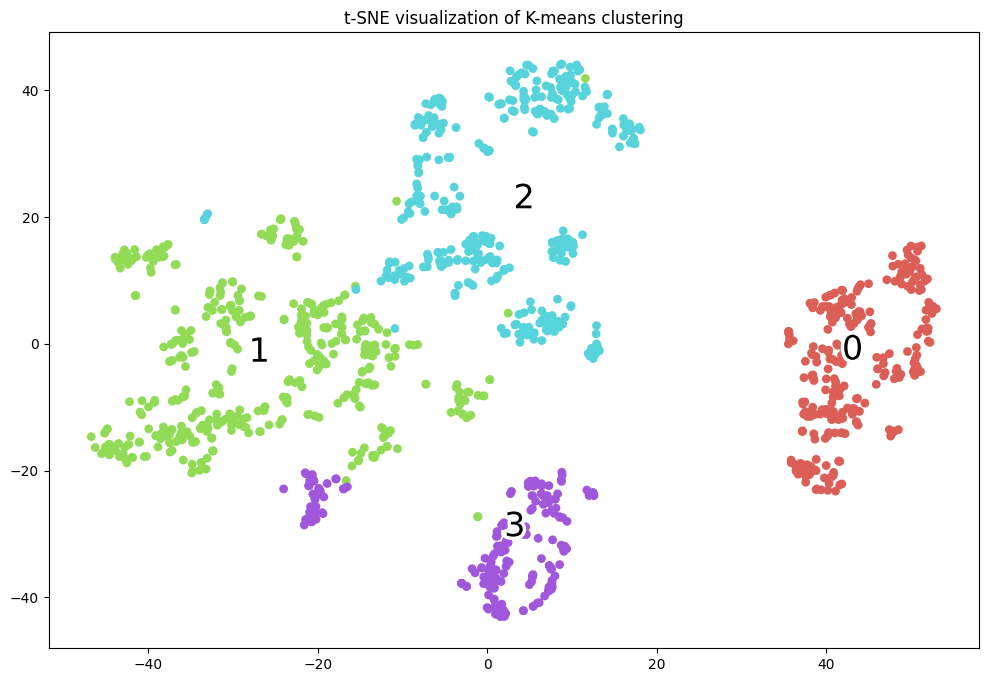

In [56]:


def _plot_kmean_scatter(df, labels):
        '''
        df: dữ liệu đầu vào sau khi giảm chiều bằng t-SNE
        labels: nhãn dự báo từ K-means
        '''
        # Lựa chọn màu sắc
        num_classes = len(np.unique(labels))
        palette = np.array(sns.color_palette("hls", num_classes))

        # Vẽ biểu đồ scatter
        fig = plt.figure(figsize=(12, 8))
        ax = plt.subplot()
        sc = ax.scatter(df[:, 0], df[:, 1], lw=0, s=40, c=palette[labels.astype(int)])
        plt.xlim(df[:, 0].min() - 5, df[:, 0].max() + 5)
        plt.ylim(df[:, 1].min() - 5, df[:, 1].max() + 5)

        # Thêm nhãn cho mỗi cluster
        txts = []

        for i in range(num_classes):
            # Vẽ text tên cụm tại trung vị của mỗi cụm
            xtext, ytext = np.median(df[labels == i, :], axis=0)
            txt = ax.text(xtext, ytext, str(i), fontsize=24)
            txt.set_path_effects([
                PathEffects.Stroke(linewidth=5, foreground="w"),
                PathEffects.Normal()
            ])
            txts.append(txt)
        plt.title('t-SNE visualization of K-means clustering')
        plt.show()

_plot_kmean_scatter(tsne_results, labels)

In [59]:
data_with_clusters = df.copy()
data_with_clusters['Clusters'] = labels

In [60]:
data_with_clusters

,Kích thước,Cân nặng,Giá(đ),Nhà sản xuất,Model,Kết nối,Loại switch,Clusters
0,0.719322,0.405072,3899000,3.362781e+06,1.625106e+06,1.770855e+06,1.561780e+06,2
1,0.719322,0.405072,2699000,3.362781e+06,1.767535e+06,1.906612e+06,1.868848e+06,0
2,0.652838,0.560227,6099000,3.362781e+06,1.984702e+06,1.763228e+06,1.868848e+06,2
3,0.652838,0.560227,5999000,3.362781e+06,2.185041e+06,1.763228e+06,2.036515e+06,2
4,0.652838,0.560227,5999000,3.362781e+06,1.987087e+06,1.763228e+06,1.868848e+06,2
...,...,...,...,...,...,...,...,...
1363,0.722872,0.461937,2999000,2.297542e+06,2.277176e+06,1.763228e+06,1.868848e+06,2
1364,0.722872,0.461937,2999000,2.297542e+06,1.743901e+06,1.906612e+06,1.815694e+06,0
1365,0.722872,0.461937,649000,8.946338e+05,1.272499e+06,1.763228e+06,1.815694e+06,1
1366,0.722872,0.461937,4589000,6.828467e+05,1.628192e+06,1.770855e+06,1.825662e+06,1


In [61]:
cluster_mean_price = data_with_clusters.groupby('Clusters')['Giá(đ)'].mean()
print(cluster_mean_price)

Clusters
0    1.906612e+06
1    1.084896e+06
2    3.095580e+06
3    8.765481e+05
Name: Giá(đ), dtype: float64


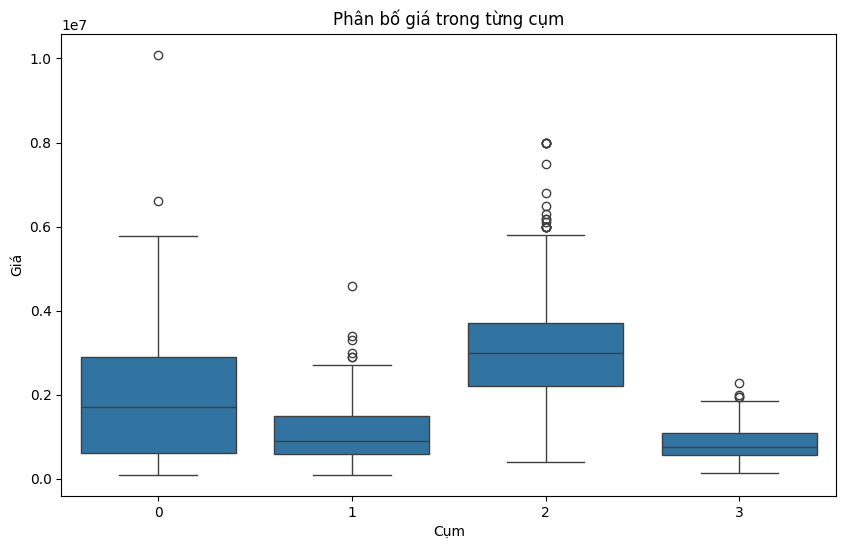

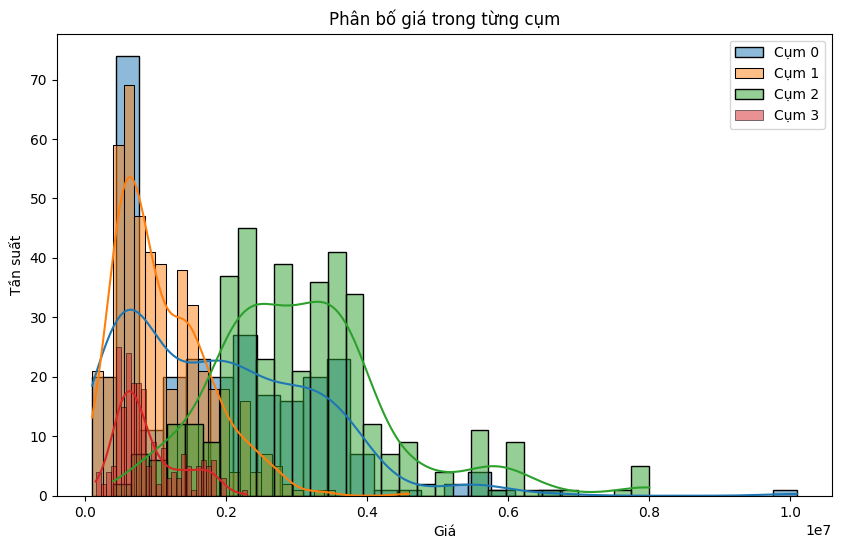

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Clusters', y='Giá(đ)', data=data_with_clusters)
plt.title('Phân bố giá trong từng cụm')
plt.xlabel('Cụm')
plt.ylabel('Giá')
plt.show()

# Vẽ biểu đồ histogram
plt.figure(figsize=(10, 6))
for i in range(4):
    sns.histplot(data_with_clusters[data_with_clusters['Clusters'] == i]['Giá(đ)'], bins=30, kde=True, label=f'Cụm {i}')
plt.title('Phân bố giá trong từng cụm')
plt.xlabel('Giá')
plt.ylabel('Tần suất')
plt.legend()
plt.show()